In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=hu---------hu-tso-0001exittransmissionro---------,hu---------hu-tso-0002exittransmissionsk---------,hu---------hu-tso-0001exitproduction,hu---------hu-tso-0001exittransmissionhr---------,hu---------hu-tso-0002entrytransmissionsk---------,hu---------hu-tso-0001exitdistribution,hu---------hu-tso-0001exitstorage,hu---------hu-tso-0001entrytransmissionat---------,hu---------hu-tso-0001exittransmissionat---------,hu---------hu-tso-0001exittransmissionsk---------,hu---------hu-tso-0001exittransmission,hu---------hu-tso-0001entryproduction,hu---------hu-tso-0001entrytransmissionro---------,hu---------hu-tso-0001entrytransmissionsk---------,hu---------hu-tso-0001entrystorage,hu---------hu-tso-0001entrytransmission,hu---------hu-tso-0001entrytransmissionhr---------&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesHUHU---------HU-TSO-0001entryProduc...        1   Aggregates   
1    1AggregatesHUHU---------HU-TSO-0001entryStorag...        1   Aggregates   
2    1AggregatesHUHU---------HU-TSO-0001entryTransm...        1   Aggregates   
3    1AggregatesHUHU---------HU-TSO-0001entryTransm...        1   Aggregates   
4    1AggregatesHUHU---------HU-TSO-0001entryTransm...        1   Aggregates   
..                                                 ...      ...          ...   
460  1AggregatesHUHU---------HU-TSO-0001exitTransmi...        1   Aggregates   
461  1AggregatesHUHU---------HU-TSO-0001exitTransmi...        1   Aggregates   
462  1AggregatesHUHU---------HU-TSO-0001exitTransmi...        1   Aggregates   
463  1AggregatesHUHU---------HU-TSO-0001exitTransmi...        1   Aggregates   
464  1AggregatesHUHU---------HU-TSO-0001exitTransmi...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day      value
0          entry    2    6858177
1          entry    2  252022880
2          entry    2  109897000
3          entry    2  110458044
4          entry    2          0
..           ...  ...        ...
460         exit    1   21006000
461         exit    1          0
462         exit    1          0
463         exit    1          0
464         exit    1          0

[465 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                         value
day directionKey              
1   entry         4.898999e+07
    exit          5.141099e+07
2   entry         7.756016e+07
    exit          7.420669e+07
3   entry         7.795578e+07
...                        ...
29  exit          4.849972e+07
30  entry         4.947321e+07
    exit          5.058740e+07
31  entry         5.117158e+07
    exit          5.206455e+07

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

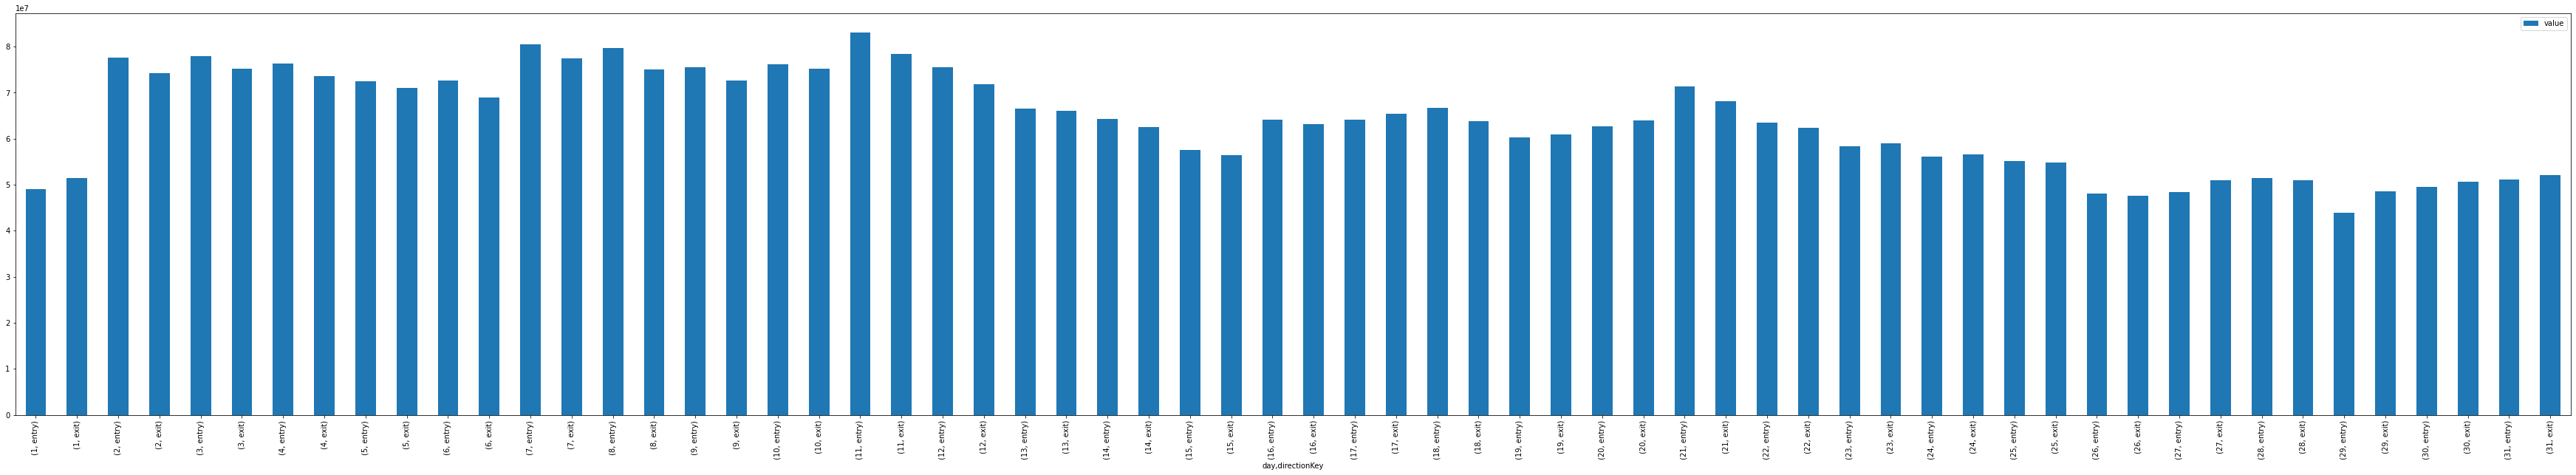

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))